In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline


In [4]:
import sqlite3
conn = sqlite3.connect('final.db')
cur = conn.cursor()

In [5]:
def scat(x,y,title, xlabel, ylabel):
    plt.scatter(x, y, alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
def heat(data):
    corrmat = data.corr()
    top_corr_features = corrmat.index

    #print(corrmat)
    plt.figure(figsize=(20,20))

    #plot heat map
    g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [6]:
def fetch_table_names(cur: sqlite3.Cursor) -> [str]:
    '''
    Retrieves all tables in the database
    '''
    
    cur.execute('SELECT name FROM sqlite_master WHERE type = \'table\';')
    return [x[0] for x in cur.fetchall()]

def fetch_column_names(cur: sqlite3.Cursor, table: str) -> [str]:
    '''
    Retrieves all columns in a table
    '''
    
    cur.execute('PRAGMA table_info(' + table + ');')
    return [x[1] for x in cur.fetchall()]

def fetch_col_values(cur: sqlite3.Cursor, table: str, col: str) -> []:
    '''
    Returns all values for a specific column
    '''
    
    cur.execute('SELECT ' + col + ' FROM ' + table + ';')
    return [x[0] for x in cur.fetchall()]


In [7]:
fetch_table_names(cur)


['SCHOOL_TRAIN', 'SCHOOL_TEST', 'POKEMON_TRAIN', 'POKEMON_TEST']

In [8]:
db_col_names=fetch_column_names(cur, 'POKEMON_TRAIN')
db_col_names

['rowid',
 'unique_id',
 'types',
 'abilities',
 'base_happiness',
 'height_m',
 'weight_kg',
 'poke_stats',
 'is_legendary']

In [9]:
db_col_names = db_col_names [::-1]
db_col_names 

['is_legendary',
 'poke_stats',
 'weight_kg',
 'height_m',
 'base_happiness',
 'abilities',
 'types',
 'unique_id',
 'rowid']

In [10]:
id_z= fetch_col_values(cur, 'POKEMON_TRAIN', "rowid")

In [11]:
aa = pd.Series(fetch_col_values(cur, 'POKEMON_TRAIN', "abilities"))

In [12]:
df = pd.DataFrame(id_z)

In [13]:
names= []
for i in db_col_names:
    val = pd.Series(fetch_col_values(cur, 'POKEMON_TRAIN', i))
    df = pd.concat([val, df], axis=1, names=i)
    names_ = names.reverse()
    #df.rename(columns = {"0":"rowid","0":"types"}, inplace = True)
    names.append(i)


In [14]:
df.columns = ["is_legendary","poke_stats","weight_kg","height_m","base_happiness","abilities","types","unique_id","rowid","rowid2"]

In [15]:
df.drop(columns=["rowid2"],inplace=True)

In [16]:
df

,is_legendary,poke_stats,weight_kg,height_m,base_happiness,abilities,types,unique_id,rowid
0,1,665,"fighting, nan","['Guts', 'Sheer Force', 'Iron Fist']",70.0,0.6,12.5,"nan, 80.0, 55.0, 25.0, 35.0, 35.0",0
1,2,288,"dragon, nan","['Bulletproof', 'Soundproof', 'Overcoat']",70.0,0.6,29.7,"nan, nan, 65.0, 45.0, 45.0, 45.0",0
2,3,349,"poison, fire","['Corrosion', 'Oblivious']",70.0,1.2,22.2,"nan, 64.0, 60.0, 111.0, 60.0, 117.0",0
3,4,260,"ground, nan","['Rock Head', 'Lightningrod', 'Battle Armor']",70.0,0.4,6.5,"nan, 50.0, 95.0, 40.0, 50.0, 35.0",0
4,5,536,"water, nan","['Torrent', 'Sheer Force']",70.0,0.6,9.5,"nan, 65.0, 64.0, 44.0, 48.0, 43.0",0
5,6,293,"dragon, fire",['Turboblaze'],0.0,3.2,330.0,"nan, 120.0, 100.0, 150.0, 120.0, 90.0",1
6,7,181,"ground, dragon",['Levitate'],70.0,1.1,15.3,"nan, 70.0, 50.0, 50.0, 50.0, 70.0",0
7,8,554,"poison, ground","['Poison Point', 'Rivalry', 'Sheer Force']",70.0,1.3,60.0,"nan, 92.0, 87.0, 75.0, 85.0, 76.0",0
8,9,507,"bug, electric",['Battery'],70.0,0.5,10.5,"nan, 82.0, 95.0, 55.0, 75.0, 36.0",0
9,10,140,"rock, poison",['Beast Boost'],0.0,1.2,55.5,"109, 53.0, 47.0, 127.0, 131.0, 103.0",1


In [17]:
#df.to_csv("/Users/josedelarosa/Desktop/TeamNomad/pokeman_train.csv")

In [18]:
test_col_names = fetch_column_names(cur, 'POKEMON_TEST')
test_col_names

['rowid',
 'unique_id',
 'types',
 'abilities',
 'base_happiness',
 'height_m',
 'weight_kg',
 'poke_stats']

In [19]:
test_col_names = test_col_names[::-1]

In [20]:
test_col_names

['poke_stats',
 'weight_kg',
 'height_m',
 'base_happiness',
 'abilities',
 'types',
 'unique_id',
 'rowid']

In [21]:
test_id_z= fetch_col_values(cur, 'POKEMON_TEST', "rowid")

In [22]:
test_aa = pd.Series(fetch_col_values(cur, 'POKEMON_TEST', "abilities"))

In [23]:
test_df = pd.DataFrame(test_id_z)

In [24]:
for i in test_col_names:
    val = pd.Series(fetch_col_values(cur, 'POKEMON_TEST', i))
    test_df = pd.concat([val, test_df], axis=1, names=i)
    #test_names.append(i)



In [25]:
test_df.columns = ['rowid',
 'unique_id',
 'types',
 'abilities',
 'base_happiness',
 'height_m',
 'weight_kg',
 'poke_stats','rowid2']

In [26]:
test_df

,rowid,unique_id,types,abilities,base_happiness,height_m,weight_kg,poke_stats,rowid2
0,1,602,"grass, nan","['Overgrow', 'Contrary']",70.0,0.6,8.1,"nan, nan, 55.0, 45.0, nan, 63.0",1
1,2,756,"fairy, flying","['Hustle', 'Serene Grace', 'Super Luck']",70.0,1.5,38.0,"nan, nan, 95.0, 120.0, 115.0, 80.0",2
2,3,191,"electric, nan","['Static', 'Plus']",70.0,1.4,61.5,"nan, 95.0, 105.0, 165.0, nan, 45.0",3
3,4,16,"psychic, nan",['Levitate'],None,0.2,0.6,"nan, 30.0, 50.0, 65.0, nan, 45.0",4
4,5,718,"fighting, psychic","['Pure Power', 'Telepathy']",None,1.3,31.5,"nan, 100.0, 85.0, 80.0, 85.0, 100.0",5
5,6,578,"ghost, poison",['Cursed Body'],70.0,1.5,40.5,"nan, 65.0, 80.0, 170.0, 95.0, 130.0",6
6,7,226,"ground, psychic",['Levitate'],70.0,1.5,108.0,"nan, 70.0, 105.0, 70.0, 120.0, 75.0",7
7,8,719,"normal, psychic","['Inner Focus', 'Telepathy', 'Symbiosis']",70.0,1.5,76.0,"nan, 60.0, 80.0, 90.0, 110.0, 60.0",8
8,9,229,"water, fairy","['Thick Fat', 'Huge Power', 'Sap Sipper']",70.0,0.8,28.5,"nan, nan, 80.0, 60.0, 80.0, 50.0",9
9,10,96,"ground, ice","['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",70.0,None,None,"nan, 100.0, 120.0, nan, 65.0, 65.0",10


In [27]:
test_df.drop(columns=["rowid2"],inplace=True)

In [28]:
test_df

,rowid,unique_id,types,abilities,base_happiness,height_m,weight_kg,poke_stats
0,1,602,"grass, nan","['Overgrow', 'Contrary']",70.0,0.6,8.1,"nan, nan, 55.0, 45.0, nan, 63.0"
1,2,756,"fairy, flying","['Hustle', 'Serene Grace', 'Super Luck']",70.0,1.5,38.0,"nan, nan, 95.0, 120.0, 115.0, 80.0"
2,3,191,"electric, nan","['Static', 'Plus']",70.0,1.4,61.5,"nan, 95.0, 105.0, 165.0, nan, 45.0"
3,4,16,"psychic, nan",['Levitate'],None,0.2,0.6,"nan, 30.0, 50.0, 65.0, nan, 45.0"
4,5,718,"fighting, psychic","['Pure Power', 'Telepathy']",None,1.3,31.5,"nan, 100.0, 85.0, 80.0, 85.0, 100.0"
5,6,578,"ghost, poison",['Cursed Body'],70.0,1.5,40.5,"nan, 65.0, 80.0, 170.0, 95.0, 130.0"
6,7,226,"ground, psychic",['Levitate'],70.0,1.5,108.0,"nan, 70.0, 105.0, 70.0, 120.0, 75.0"
7,8,719,"normal, psychic","['Inner Focus', 'Telepathy', 'Symbiosis']",70.0,1.5,76.0,"nan, 60.0, 80.0, 90.0, 110.0, 60.0"
8,9,229,"water, fairy","['Thick Fat', 'Huge Power', 'Sap Sipper']",70.0,0.8,28.5,"nan, nan, 80.0, 60.0, 80.0, 50.0"
9,10,96,"ground, ice","['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",70.0,None,None,"nan, 100.0, 120.0, nan, 65.0, 65.0"


In [29]:
#test_df.to_csv("/Users/josedelarosa/Desktop/TeamNomad/pokeman_test.csv")

In [34]:
test_df = test_df.drop(columns="rowid", inplace=T)

AttributeError: 'NoneType' object has no attribute 'head'

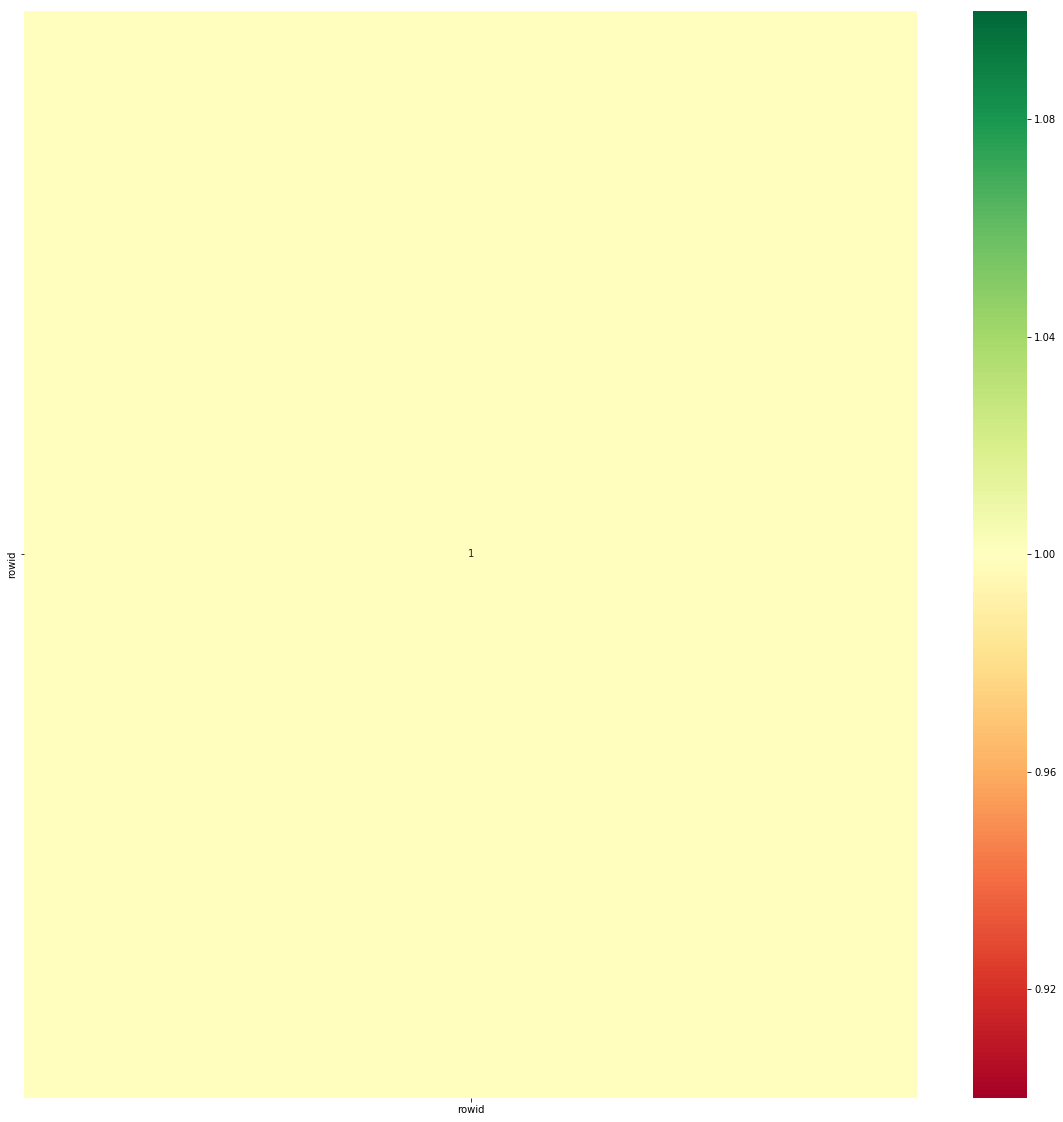

In [33]:
heat(test_df)